In [1]:
import networkx as nx
import pandas as pd
import pickle
import collections
import matplotlib.pyplot as plt
import numpy as np

In [2]:
G = nx.read_edgelist("data/modified_giant.csv")
E = nx.read_edgelist("data/missing_edges.csv")
with open("data/modified_giant.csv_louvain_1.0.pkl", "rb") as f:
    L = pickle.load(f)

In [3]:
num_same_comm = 0
for src, dst in E.edges():
    if L[src] == L[dst]:
        num_same_comm += 1
print("Percent in same community = ", float(num_same_comm) / float(E.number_of_edges()) * 100)

Percent in same community =  53.24386947287121


In [4]:
# with open("data/giant.csv_louvain_1.0.pkl", "rb") as f:
#     L2 = pickle.load(f)
# num_same_comm2 = 0
# for src, dst in E.edges():
#     if L2[src] == L2[dst]:
#         num_same_comm2 += 1
# print("Percent in same community = ", float(num_same_comm2) / float(E.number_of_edges()) * 100)

In [5]:
comms = np.unique(list(L.values()))

In [6]:
commsizes = dict()
for comm in comms:
    commsizes[comm] = 0
for vertex, comm in L.items():
    commsizes[comm] += 1

In [7]:
summary = nx.Graph()
summary.add_nodes_from(comms)
nx.set_node_attributes(summary, commsizes, name="Size")
for vertex in G.nodes:
    community = L[vertex]
    for neighbor in G.neighbors(vertex):
        ncommunity = L[neighbor]
        summary.add_edge(community, ncommunity)

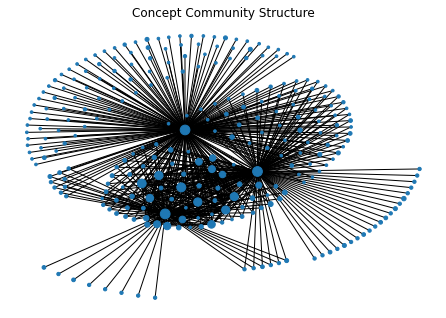

In [10]:
plt.figure()
nx.draw_kamada_kawai(summary, node_size=np.log(list(nx.get_node_attributes(summary, name="Size").values()))*10)
plt.title("Concept Community Structure")
plt.savefig("fig/community_structure.png", format="png")

In [36]:
# res = nx.jaccard_coefficient(G)

In [ ]:
# with open("data/jaccard.result.csv", "w") as f:
#     for src, dst, val in res:
#         f.write("{0},{1},{2}\n".format(src, dst, val))

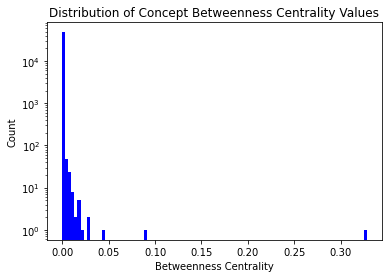

In [17]:
with open("data/modified_giant.csv.bc_results.pkl", "rb") as f:
    BC = pickle.load(f)

fig, ax = plt.subplots()  # figsize=(10, 5))
plt.yscale("log")
plt.hist(BC.values(), color="b", bins=100)
# ax.set_xticklabels([0, 1000, 2000, 3000, 4000])
plt.title("Distribution of Concept Betweenness Centrality Values")
plt.ylabel("Count")
plt.xlabel("Betweenness Centrality")
plt.savefig("fig/betweenness_centrality.png", format="png")
# ax.set_xticks([d + 0.4 for d in deg])
# # ax.set_xticklabels(deg)
# plt.show()

In [6]:
# avg_shortest_path = nx.average_shortest_path_length(graph)
# print(avg_shortest_path)

In [7]:
ccs = nx.connected_components(graph)
ccs = list(ccs)
nccs = len(ccs)
print("num ccs = ", nccs)
print("average ccs size = ", graph.number_of_nodes() / nccs)

num ccs =  253
average ccs size =  192.80237154150197


In [9]:
# giant = max([graph.subgraph(c).copy() for c in ccs], key=len)
# giant.remove_edges_from(nx.selfloop_edges(giant))
# print(giant.number_of_nodes())
# print(giant.number_of_edges())
# nx.write_edgelist(giant, "data/giant.csv", data=False)

48272
310742


In [8]:
# avg_shortest_path = nx.average_shortest_path_length(giant)
# print(avg_shortest_path)

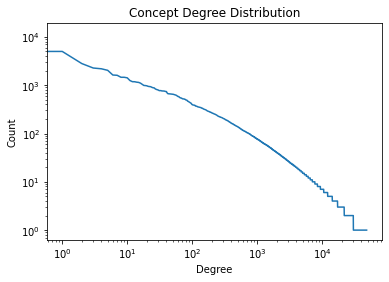

In [28]:
import collections
import matplotlib.pyplot as plt
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# degreeCount = collections.Counter(degree_sequence)
# deg, cnt = zip(*degreeCount.items())
# print(degreeCount)
# print(max(deg))
# print(max(cnt))

fig, ax = plt.subplots()  # figsize=(10,5))
plt.xscale("log")
plt.yscale("log")
plt.plot(degree_sequence)
# plt.hist(degree_sequence, bins=1000, color="b")  # , width=2.0, color="b")
# ax.set_xticklabels([0, 1000, 2000, 3000, 4000])
plt.title("Concept Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.savefig("fig/degree_distribution.png", format="png")
# ax.set_xticks([d + 0.4 for d in deg])
# # ax.set_xticklabels(deg)
# plt.show()

In [11]:
# with open("data/modified_giant.csv_nx_apsp.apsp_results.pkl", "rb") as f:
#     apsp = pickle.load(f)
# sps = pd.read_csv("data/modified_giant_shortest_paths.csv")
# sps.head()
import random

vertices = list(G.nodes())
nvertices = G.number_of_nodes()
pairs = list()
pairs_checked = dict()
for i in range(1000000):
    v1, v2 = random.sample(vertices, k=2)
    str1 = "{0}-{1}".format(v1, v2)
    str2 = "{0}-{1}".format(v2, v1)
    while str1 in pairs_checked or G.has_edge(v1, v2) or v1 == v2:
        v1, v2 = random.sample(vertices, k=2)
        str1 = "{0}-{1}".format(v1, v2)
        str2 = "{0}-{1}".format(v2, v1)
    pairs.append((v1, v2))
    pairs_checked[str1] = True
    pairs_checked[str2] = True
    if i % 100000 == 0:
        print(i, " / 1000000")
sssps = [nx.shortest_path(G, pair[0], pair[1]) for pair in pairs]

0  / 1000000
100000  / 1000000
200000  / 1000000
300000  / 1000000
400000  / 1000000
500000  / 1000000
600000  / 1000000
700000  / 1000000
800000  / 1000000
900000  / 1000000


In [12]:
len(sssps)

1000000

In [13]:
# vertices = list(giant)
# # for v1 in range(giant.number_of_nodes()):
# with open("data/shortest_paths.csv", mode="w") as spsfile:
#     spsfile.write("src,dst,length\n")
#     for v1 in range(giant.number_of_nodes()):
# #     for v1 in range(5):
#         vid = vertices[v1]
#         sps = nx.shortest_path_length(giant, source=vid)
#         for key, value in sps.items():
#             if value <= 1:  # only store non-neighbors and non-self
#                 continue
#             spsfile.write("{0},{1},{2}\n".format(vid, key, value))
#         maxkey = max(sps, key=sps.get)
#         if v1 % 1000 == 0:
#             print("{0} / {1}".format(v1, giant.number_of_nodes()))
#     #     print(maxkey, sps[maxkey])

In [42]:
print(df.shape)
print(df[df['src'].apply(lambda x: len(x) == 8)].shape)
print(df[df['dst'].apply(lambda x: len(x) == 8)].shape)

(900881, 2)
(900881, 2)
(900881, 2)


In [15]:
import random

missing_graph = nx.Graph()

percent_edges_to_remove = 0.2  # remove 20% of edges
num_edges_to_remove = int(0.2 * giant.number_of_edges())
modified_giant = giant.copy()
num_removed = 0
while num_removed < num_edges_to_remove:
# for edge in range(num_edges_to_remove):
    edges = list(modified_giant.edges())
    u, v = random.choice(edges)
    if modified_giant.degree[u] < 2 or modified_giant.degree[v] < 2:
        continue
    modified_giant.remove_edge(u, v)
    missing_graph.add_edge(u, v)
    num_removed += 1

nx.write_edgelist(modified_giant, "data/modified_giant.csv", data=False)
nx.write_edgelist(missing_graph, "data/missing_edges.csv", data=False)

KeyboardInterrupt: 

In [27]:
import random

missing_graph = nx.Graph()

percent_edges_to_remove = 0.2  # remove 20% of edges
num_edges_to_remove = int(percent_edges_to_remove * giant.number_of_edges())
modified_giant = giant.copy()
num_removed = 0
high_degree_vertices = list()
for vertex in modified_giant.nodes:
    if modified_giant.degree[vertex] > 1:
        high_degree_vertices.append(vertex)
# if len(high_degree_vertices) < num_edges_to_remove:
#     print("high_degree_vertices = ", len(high_degree_vertices))
#     print("num edges to remove = ", num_edges_to_remove)
#     raise ValueError

while num_removed < num_edges_to_remove:
    src = random.choice(high_degree_vertices)
    dsts = list()
    for neighbor in modified_giant.neighbors(src):
        if modified_giant.degree[neighbor] > 1:
            dsts.append(neighbor)
    if len(dsts) == 0:
        high_degree_vertices.remove(src)
        continue
    dst = random.choice(dsts)
    modified_giant.remove_edge(src, dst)
    missing_graph.add_edge(src, dst)
    num_removed += 1
    if len(high_degree_vertices) < 2:
        print("Ran out of high degree vertices")
        print("Number of removed edges = ", missing_graph.number_of_edges())
        break
    
#     edges = list(modified_giant.edges())
#     u, v = random.choice(edges)
#     if modified_giant.degree[u] < 2 or modified_giant.degree[v] < 2:
#         continue
#     modified_giant.remove_edge(u, v)
#     missing_graph.add_edge(u, v)
#     num_removed += 1

nx.write_edgelist(modified_giant, "data/modified_giant.csv", data=False)
nx.write_edgelist(missing_graph, "data/missing_edges.csv", data=False)

In [43]:
import random

missing_graph = nx.Graph()

percent_edges_to_remove = 0.2  # remove 20% of edges
num_edges_to_remove = int(percent_edges_to_remove * giant.number_of_edges())
modified_giant = giant.copy()
num_removed = 0

mst = nx.minimum_spanning_tree(giant)
possible_edges = nx.difference(giant, mst)  # this graph contains edges that can safely be removed
print("num edges to remove = ", num_edges_to_remove)
print("num possible edges = ", possible_edges.number_of_edges())

# for i in range(num_edges_to_remove):
edges = list(possible_edges.edges())
edges_to_remove = random.sample(edges, k=num_edges_to_remove)
print("got edges to be removed")
for u, v in edges_to_remove:
    modified_giant.remove_edge(u, v)
#     possible_edges.remove_edge(u, v)
    missing_graph.add_edge(u, v)
#     num_removed += 1

nx.write_edgelist(modified_giant, "data/modified_giant.csv", data=False)
nx.write_edgelist(missing_graph, "data/missing_edges.csv", data=False)

num edges to remove =  62148
num possible edges =  262471
got edges to be removed


48272 248594
19684 62148
min =  2  max =  6


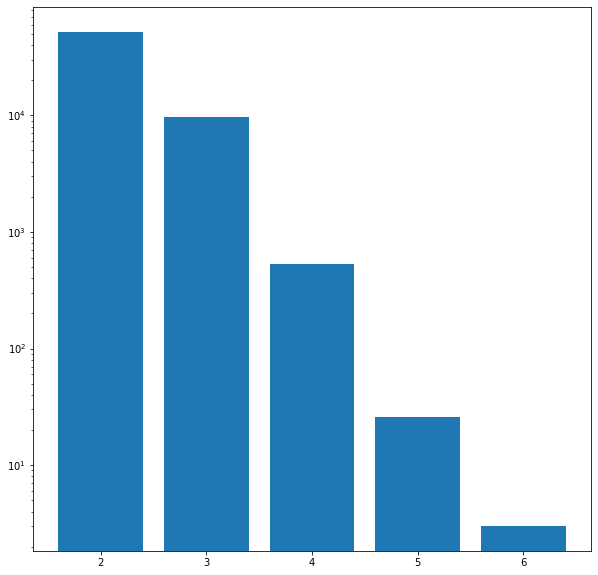

In [45]:
from collections import Counter
print(modified_giant.number_of_nodes(), modified_giant.number_of_edges())
print(missing_graph.number_of_nodes(), missing_graph.number_of_edges())
sssps = list()
for src, dst in missing_graph.edges:
    path = nx.shortest_path(modified_giant, source=src, target=dst)
    sssps.append((src, dst, len(path) - 1))  # num edges = num vertices - 1 (a -> b -> c == 2 edges but 3 vertices)
pathlengths = Counter([x[2] for x in sssps])
# fig, ax = plt.subplots(figsize=(10,10))
# plt.xscale("log")
# plt.plot(deg, cnt)  # , width=2.0, color="b")
# # ax.set_xticklabels([0, 1000, 2000, 3000, 4000])
# plt.title("Path Lengths")
# plt.ylabel("Count")
# plt.xlabel("Path Length")
# print(pathlengths[:50])
fig, ax = plt.subplots(figsize=(10,10))
plt.yscale("log")
plt.bar(pathlengths.keys(), pathlengths.values())  # , bins=20, histtype='stepfilled', log=False)
print("min = ", min(pathlengths), " max = ", max(pathlengths))

In [46]:
for sp in sssps:
    if sp[2] == 0:
        print(sp)

In [ ]:
# why is deployment on supercomputers important?
# what we deployed?
# evaluation criteria

In [1]:
import pickle
with open("data/giant.csv_louvain_1.0.pkl", "rb") as f:
    louvain_results = pickle.load(f)